## import the libraries

In [86]:
import tensorflow as tf
from tensorflow import keras  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import os 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import plotly.graph_objects as go
import seaborn as sns
from PIL import Image
import warnings 
warnings.filterwarnings('ignore')

## load the data

In [87]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
data = []
paths = []
result = []

for r, d, f in os.walk(r'data/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

paths = []
for r, d, f in os.walk(r"data/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [88]:
data = np.array(data) / 255
data.shape

(140, 128, 128, 3)

In [89]:
result = np.array(result)
result = result.reshape(140,2)

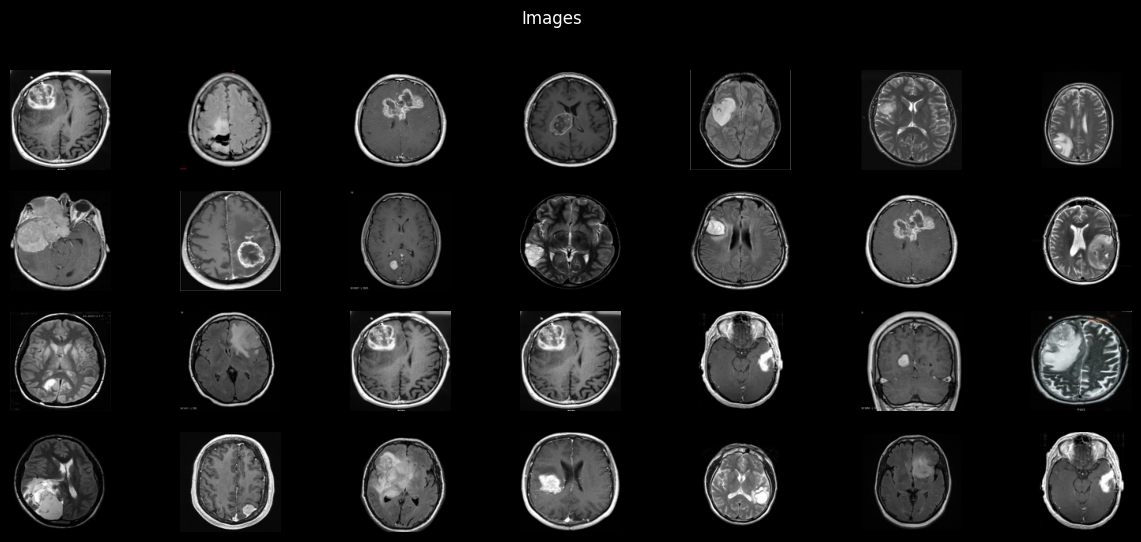

In [90]:
plt.figure(figsize=(15,6))
i = 1
for img in (data):
    plt.subplot(4,7,i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    i += 1
    if i > 7*4:
        break
plt.suptitle('Images');

## split data

In [91]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## CNN model

In [92]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, monitor='loss')
]

In [93]:
model = keras.Sequential(
    [
    keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'),
    keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', padding='Same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='Same'),
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='Same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
    ]
)

In [94]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

In [95]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [96]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 40, verbose = True,validation_data = (x_test, y_test), callbacks=callbacks)

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4924 - loss: 24.9913 - val_accuracy: 0.5714 - val_loss: 2.1449
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 867ms/step - accuracy: 0.5723 - loss: 60.6512 - val_accuracy: 0.6786 - val_loss: 0.9697
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 870ms/step - accuracy: 0.6812 - loss: 19.2534 - val_accuracy: 0.7857 - val_loss: 0.5603
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 862ms/step - accuracy: 0.7022 - loss: 9.7872 - val_accuracy: 0.7143 - val_loss: 0.4565
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 887ms/step - accuracy: 0.7585 - loss: 5.6415 - val_accuracy: 0.7857 - val_loss: 0.4306
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 913ms/step - accuracy: 0.8250 - loss: 4.6200 - val_accuracy: 0.7143 - val_loss: 0.4745
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 894ms/step - accuracy: 0.8107 - loss: 4.7201 - val_accuracy: 0.8214 - val_loss: 0.4257
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 917ms/step - accuracy: 0.9513 - loss: 0.7268 - val_accuracy: 0.8929 - val_loss:

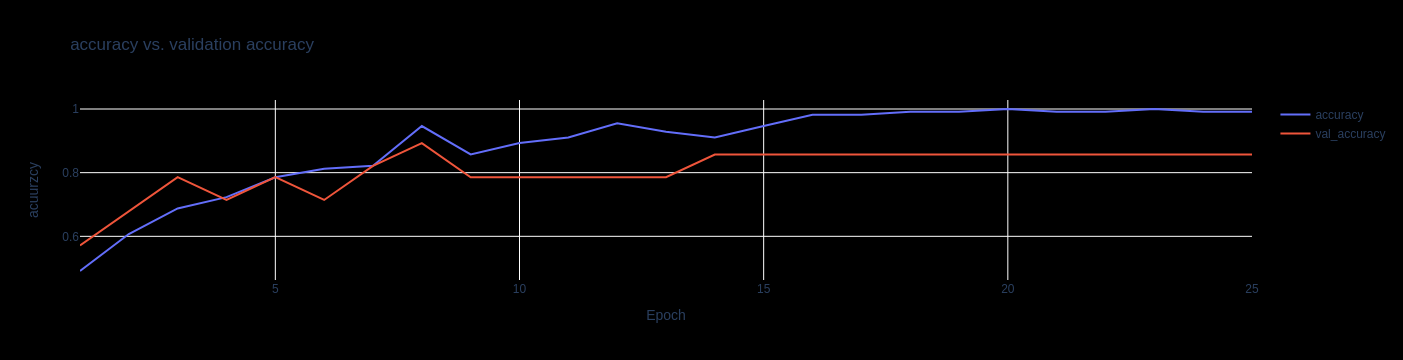

In [97]:
my_dict = history.history
number_range = []
for i in range(1, 31):
    number_range.append(i)
    
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']

fig = go.Figure()
fig.add_trace(go.Scatter(x=number_range, y=accuracy, mode='lines', name='accuracy'))
fig.add_trace(go.Scatter(x=number_range, y=val_accuracy, mode='lines', name='val_accuracy'))
fig.update_layout(title='accuracy vs. validation accuracy',xaxis_title='Epoch',yaxis_title='acuurzcy', plot_bgcolor='black', paper_bgcolor='black')

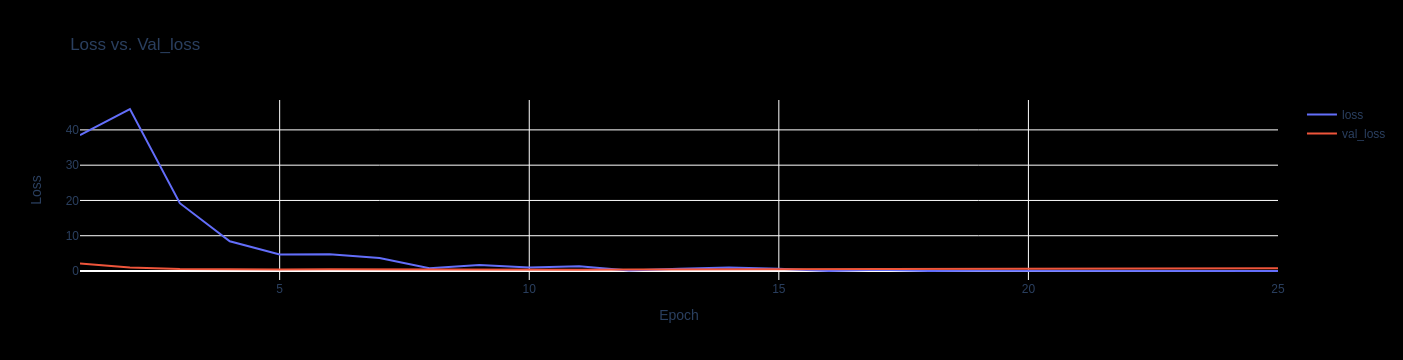

In [98]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']

fig = go.Figure()
fig.add_trace(go.Scatter(x=number_range, y=loss, mode='lines', name='loss'))
fig.add_trace(go.Scatter(x=number_range, y=val_loss, mode='lines', name='val_loss'))

fig.update_layout(title='Loss vs. Val_loss',xaxis_title='Epoch',yaxis_title='Loss', plot_bgcolor='black', paper_bgcolor='black')

## test the model

In [99]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8571 - loss: 0.8040


[0.8040283918380737, 0.8571428656578064]

In [100]:
y_pred = model.predict(x_test)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


In [101]:
CR = classification_report(y_test_bool, y_pred_bool)
print(CR)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.81      0.93      0.87        14

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.86        28



In [102]:
print(f1_score(y_pred_bool, y_test_bool))

0.8666666666666667


<Axes: >

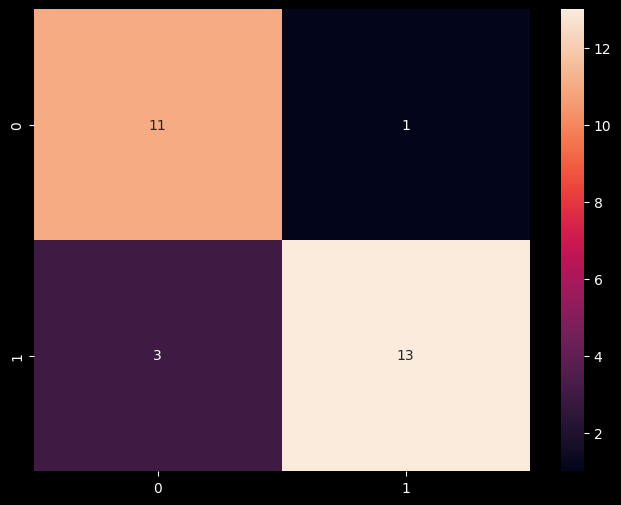

In [103]:
con = confusion_matrix(y_pred_bool, y_test_bool)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True)

## save model

In [104]:
model.save('model.h5')